# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
demo = pd.read_csv('demo01.csv')
demo.isna().sum()


sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [8]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [9]:
demo.mau.value_counts()

False    16260
True       390
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [16]:
categorias = []
for variaveis in demo:
    variavel = len(demo[variaveis].unique())
    categorias.append(len(demo[variaveis].unique()))


lista = pd.DataFrame(demo.dtypes)
lista['qtd_categorias'] = categorias
lista

,0,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [17]:
demo_encode = pd.get_dummies(demo, columns=['tipo_renda', 'educacao', 'estado_civil','tipo_residencia'], drop_first=True)
demo_encode.head(20)
demo_encode = demo_encode.replace({'sexo': {'M': 1, 'F':0}, 'posse_de_veiculo': {'Y':1, 'N':0}, 'posse_de_imovel' :{'Y':1, 'N':0}})
demo_encode

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,1,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,1,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [18]:
()

()

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [19]:
freq_total = pd.crosstab(demo_encode['mau'], [demo_encode['possui_email'],demo_encode['posse_de_veiculo']])
freq_email = pd.crosstab(demo_encode['mau'], demo_encode['possui_email'])
freq_veiculo = pd.crosstab(demo_encode['mau'], demo_encode['posse_de_veiculo'])
freq_email

possui_email,0,1
mau,,
False,14810,1450
True,360,30


In [20]:
freq_veiculo

posse_de_veiculo,0,1
mau,,
False,9931,6329
True,247,143


In [21]:
freq_total

possui_email         0          1     
posse_de_veiculo     0     1    0    1
mau                                   
False             9108  5702  823  627
True               233   127   14   16

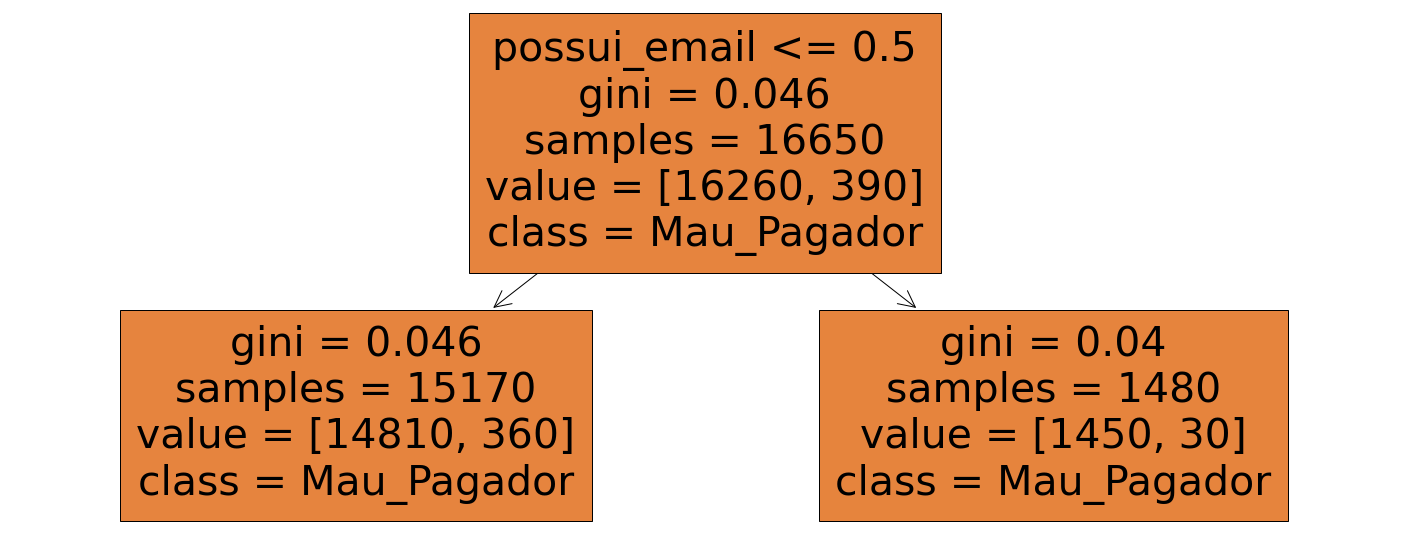

In [33]:
y = demo_encode.mau
x = demo_encode.drop('mau', axis=1)
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x[['possui_email']],y)


plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau_Pagador', 'Normal'],
          feature_names=['possui_email']);


DecisionTreeClassifier(random_state=100)

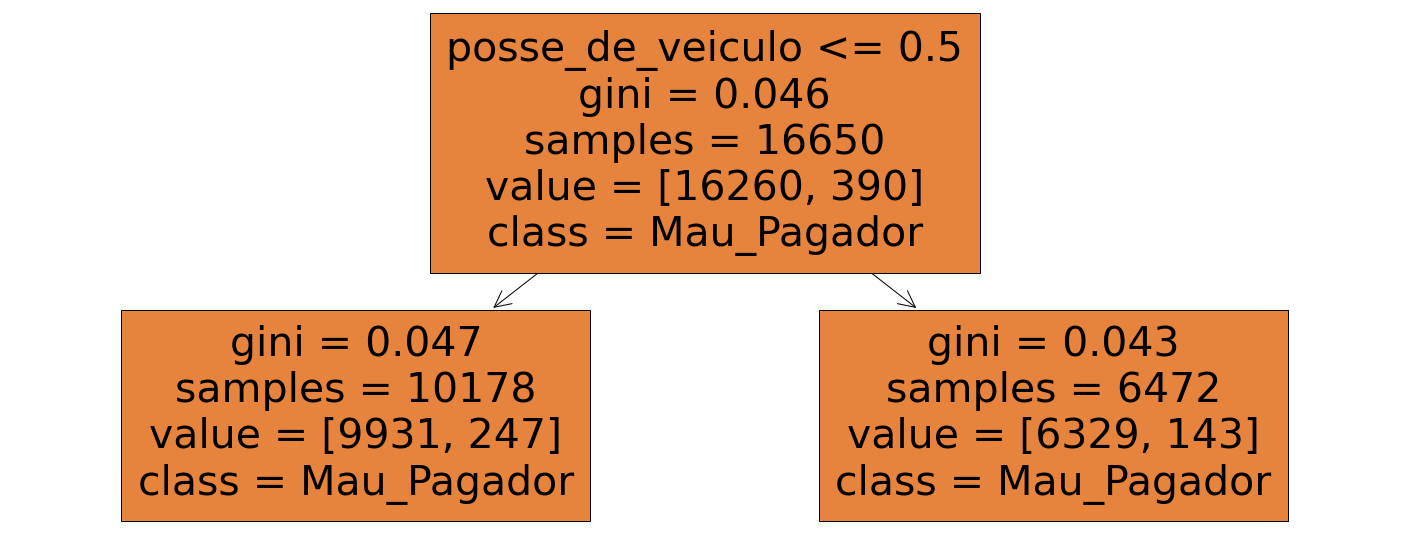

In [35]:
clf = clf.fit(x[['posse_de_veiculo']],y)


plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau_Pagador', 'Normal'],
          feature_names=['posse_de_veiculo']);

clf

A variavel possui_email gera respostas com gini menor.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [116]:
demo_encode.to_csv("Modulo7.csv")